<a href="https://colab.research.google.com/github/XingxinHE/Python-for-Data-Analysis-Notes/blob/master/9_2_Plotting_with_pandas_and_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing seaborn modifies the default matplotlib color schemes and plot styles to improve readability and aesthetics. Even if you do not use the seaborn API, you may prefer to import seaborn as a simple way to improve the visual aesthetics of general matplotlib plots.

也就是说，再import seaborn之后，matplotlib的色彩和blabla之类的都会改变，变得更加好看

In [1]:
# 另外一个很有用的可视化library是seaborn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Line Plots

In [2]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0    -0.085015
10   -1.066398
20   -2.171894
30   -2.420129
40   -2.906430
50   -2.413264
60   -2.481884
70   -3.642082
80   -2.947353
90   -3.452400
dtype: float64

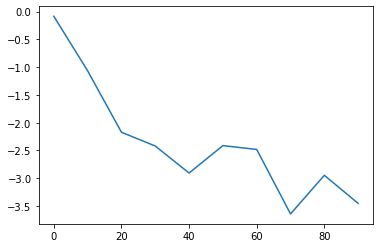

In [3]:
s.plot()

DataFrame的columns是plot里面不同的labels

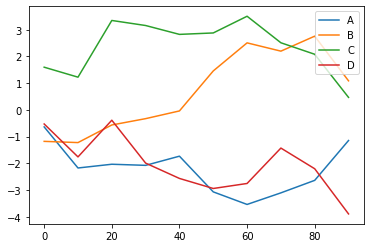

In [4]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
          columns=['A', 'B', 'C', 'D'],
          index=np.arange(0, 100, 10))
df.plot()

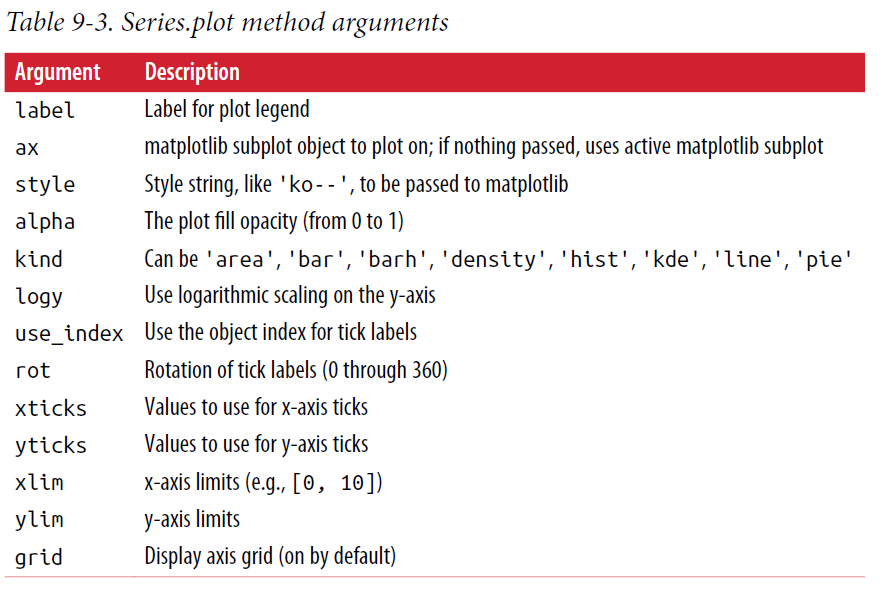

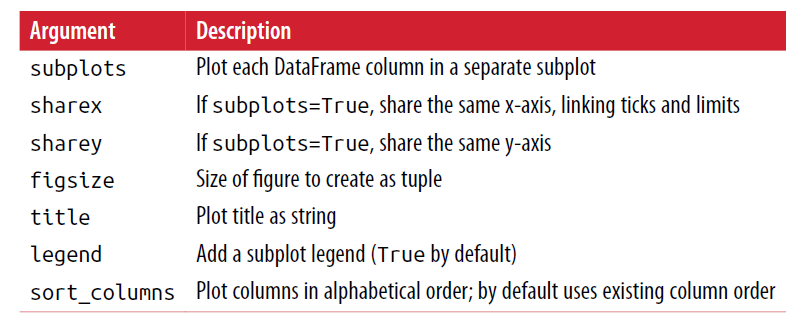

## Bar Plots

plot.bar() 柱状图

plot.barh() 横向柱状图

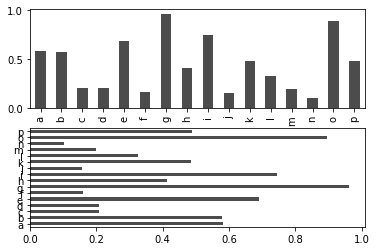

In [5]:
#创建fig&axe
fig, axes = plt.subplots(2, 1)

#data
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

#plot
data.plot.bar(ax = axes[0], color='k', alpha=0.7)
data.plot.barh(ax = axes[1], color='k', alpha=0.7)

#观察下图可知道把pd.Series弄成bar图的话，x轴是index，y是value

In [6]:
#对于dataframe来说，柱状图的会把columns group起来
#如下

df = pd.DataFrame(np.random.rand(6, 4),
          index=['one', 'two', 'three', 'four', 'five', 'six'],
          columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

df

Genus,A,B,C,D
one,0.464920,0.043950,0.769400,0.676327
two,0.869940,0.692227,0.350904,0.270808
three,0.675696,0.255215,0.562898,0.274257
four,0.303159,0.635607,0.362315,0.040078
five,0.555968,0.048230,0.041000,0.604981
six,0.036766,0.699909,0.187378,0.969237


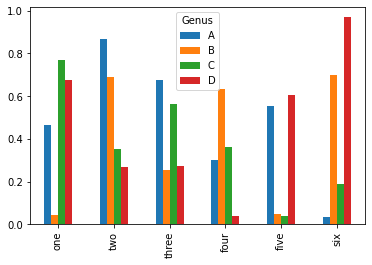

In [7]:
df.plot.bar()

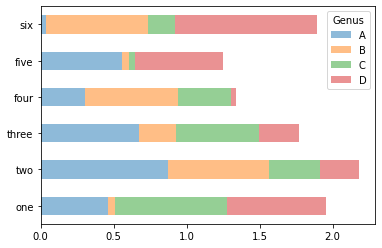

In [8]:
df.plot.barh(stacked=True, alpha=0.5)

案例分析：

In [9]:
url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/tips.csv'
tips = pd.read_csv(url)
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [10]:
#将day和size分别作为row和column
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [11]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [12]:
#标准化总和为1，normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0) #这个贼强，就是把所有的值normalization，加起来为1
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


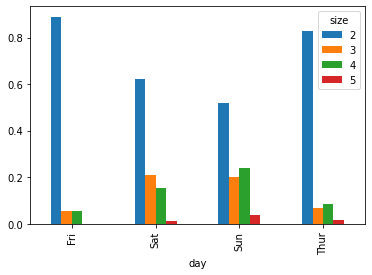

In [13]:
party_pcts.plot.bar()

## Histograms and Density Plots

In [15]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) #pct = percentage
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


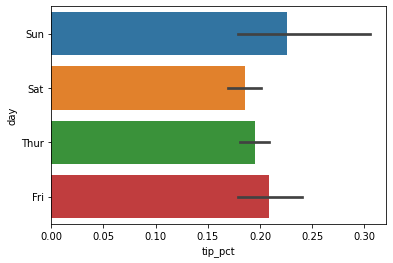

In [16]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h') #指定X轴为百分比，Y轴为日期

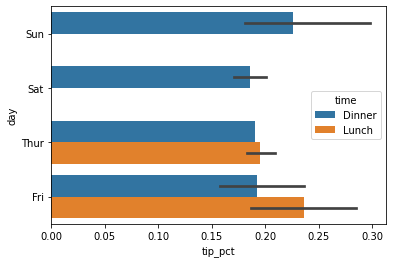

In [17]:
sns.barplot(x='tip_pct', y='day', data=tips, hue='time', orient='h') #通过颜色区分一个新的category

## Histogram and Density Plots

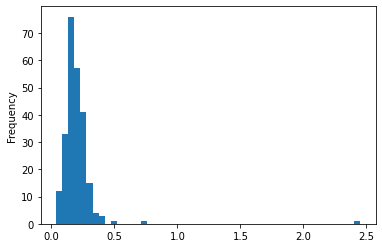

In [18]:
tips['tip_pct'].plot.hist(bins=50)

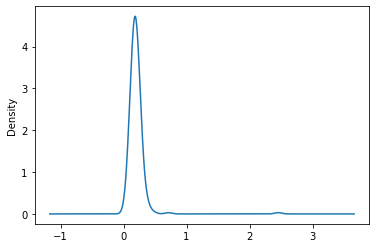

In [19]:
#density plot = kde(kernel density estimate)
tips['tip_pct'].plot.density()

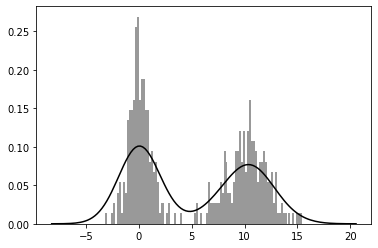

In [20]:
#.distplot是density+histogram的意思
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.distplot(values, bins=100, color='k')

## Scatter or Point Plots

In [21]:
url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/macrodata.csv'
macro = pd.read_csv(url)
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()

In [22]:
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


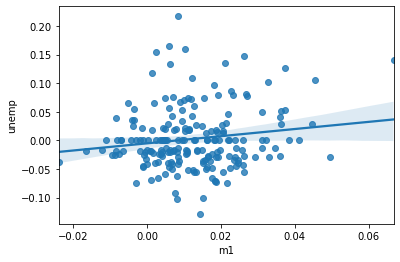

In [23]:
# .regplot()  回归曲线的plot
sns.regplot('m1', 'unemp', data=trans_data)

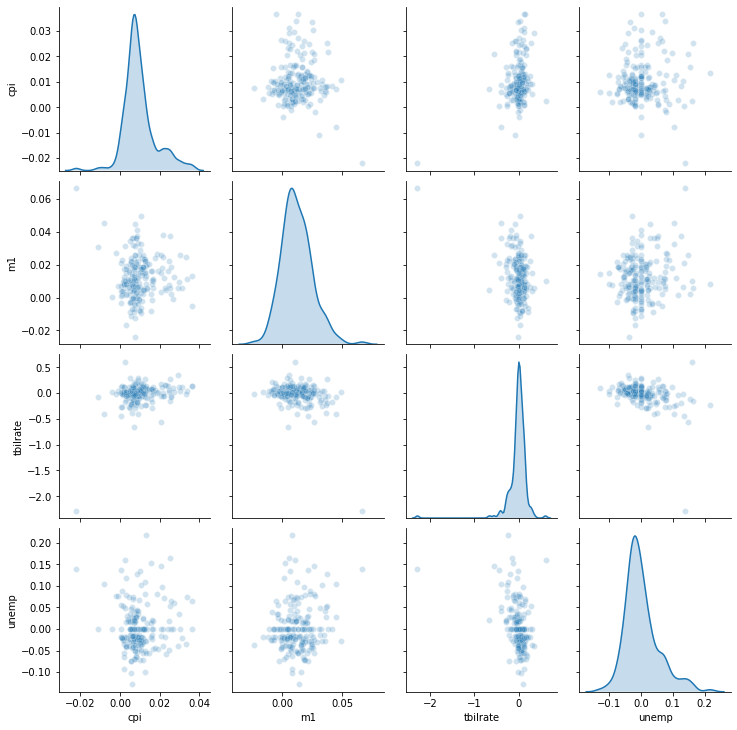

In [24]:
# .pairplot()  观察数据常用的函数
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha':0.2})

## Facet Grids and Categorical Data

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


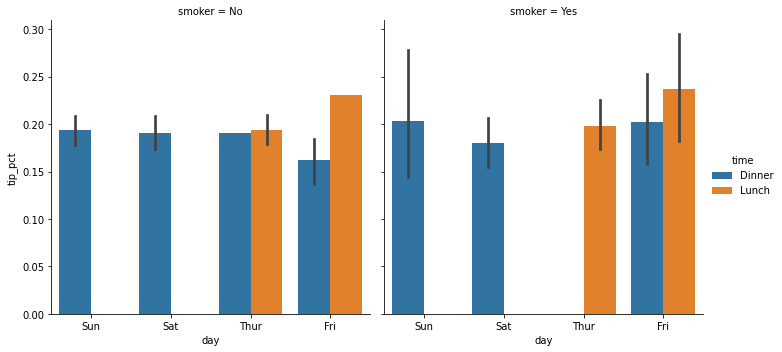

In [25]:
# .factorplot()
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct<1])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


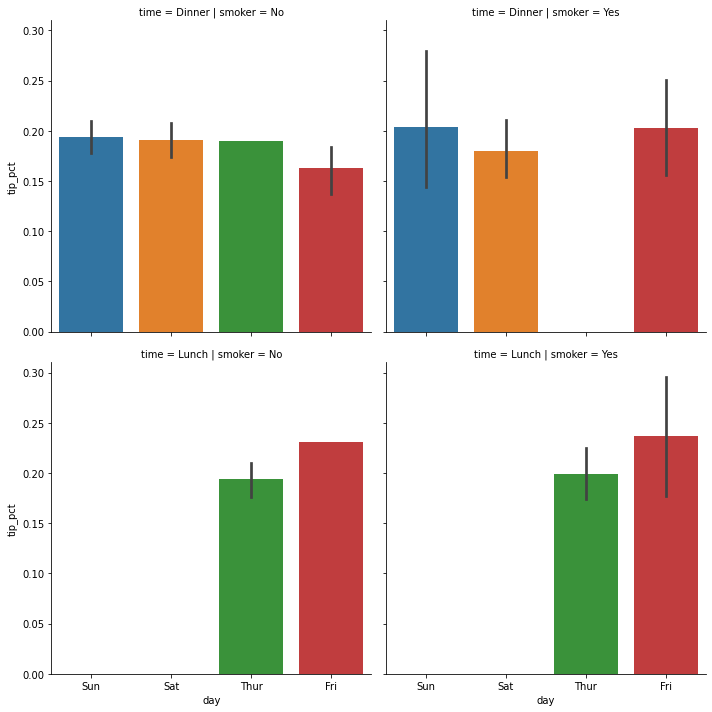

In [26]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct<1])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


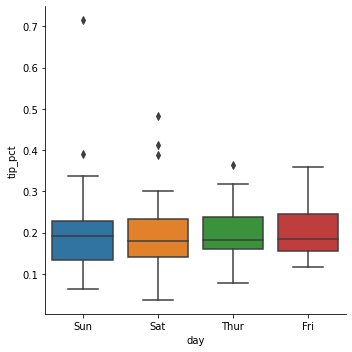

In [27]:
sns.factorplot(x='day', y='tip_pct', kind='box', data=tips[tips.tip_pct<1])